# Training

- Each excel file is for a department
- Doc numbers and names are the same in all departments
- Learner roles are different per department
- There are more doc nummbers in IT

## Import

In [183]:
import os
import sys
import subprocess
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

clean_data_path = os.path.join(parent_dir, "Data", "Clean_data", "Biotheus", "Training_Nantong")

## Load data

DP Training Matrix

In [184]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
DP = pd.read_excel(os.path.join(path, "DP Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
DP.columns=['doc number', 'doc name', 'DP总监', 'DP经理', 'DP主管', '配液及清洗灭菌', '洗烘瓶', '灌装', '轧盖', '目检', '包装']
DP = DP.replace('√', 1).replace(np.nan, 0).replace('—', 0)
DP = DP[DP['doc number'] != 0]
DP = DP[DP['doc number'] != np.nan]
DP = DP.iloc[0:377]
print(DP.shape)

DP_col_number = DP.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
DP_row_number = DP.shape[0]  # Get number of rows == number of documents

DP.to_excel(os.path.join(clean_data_path, "DP.xlsx"), index=False)

(377, 11)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\3389045826.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DP = DP.replace('√', 1).replace(np.nan, 0).replace('—', 0)


DS Training Matrix

In [185]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
DS = pd.read_excel(os.path.join(path, "DS Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
DS.columns=['doc number', 'doc name', 'DS高级经理', '细胞培养工程师', '细胞培养助理工程师', '细胞培养技术员', '细胞培养实习生', '纯化主管', '纯化工程师', '纯化助理工程师', '纯化技术员', '纯化\n实习生']
DS = DS.replace('√', 1).replace(np.nan, 0).replace('—', 0)
DS = DS[DS['doc number'] != 0]
DS = DS[DS['doc number'] != np.nan]
DS = DS.iloc[:377]
print(DS.shape)

DS_col_number = DS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
DS_row_number = DS.shape[0]  # Get number of rows == number of documents

DS.to_excel(os.path.join(clean_data_path, "DS.xlsx"), index=False)

C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\629843108.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DS = DS.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(377, 12)


EHS培训矩阵

In [186]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
EHS = pd.read_excel(os.path.join(path, "EHS培训矩阵.xlsx"), sheet_name="Sheet1", header=2)
EHS.columns=['doc number', 'doc name', 'EHS经理', 'EHS主管', 'EHS工程师']
EHS = EHS.replace('√', 1).replace(np.nan, 0).replace('—', 0)
EHS = EHS[EHS['doc number'] != 0]
EHS = EHS[EHS['doc number'] != np.nan]
EHS = EHS.iloc[:377]
print(EHS.shape)

EHS_col_number = EHS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
EHS_row_number = EHS.shape[0]  # Get number of rows == number of documents

EHS.to_excel(os.path.join(clean_data_path, "EHS.xlsx"), index=False)

(377, 5)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\3450357605.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  EHS = EHS.replace('√', 1).replace(np.nan, 0).replace('—', 0)


IT Training Matrix

In [187]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
IT = pd.read_excel(os.path.join(path, "IT Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
IT.columns=['doc number', 'doc name', 'IT总监', 'IT经理', 'IT副经理', 'IT工程师', 'IT助理工程师']
IT = IT.replace('√', 1).replace(np.nan, 0).replace('—', 0)
IT = IT[IT['doc number'] != 0]
IT = IT[IT['doc number'] != np.nan]
IT = IT.iloc[:400]
print(IT.shape)

IT_col_number = IT.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
IT_row_number = IT.shape[0]  # Get number of rows == number of documents

IT.to_excel(os.path.join(clean_data_path, "IT.xlsx"), index=False)

(400, 7)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\698985519.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  IT = IT.replace('√', 1).replace(np.nan, 0).replace('—', 0)


There are more doc nummbers in IT

In [188]:
x = IT[~IT['doc number'].isin(DP['doc number'])]
len(x)

28

MM Training Matrix

In [189]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MM = pd.read_excel(os.path.join(path, "MM Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
MM.drop(columns='Unnamed: 0', inplace=True)
MM.columns=['doc number', 'doc name', '供应链总监', '仓库主管', '仓库管理员', '仓库助理管理员', '仓库实习生', '叉车司机']
MM = MM.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MM = MM[MM['doc number'] != 0]
MM = MM[MM['doc number'] != np.nan]
MM = MM.iloc[:403]
print(MM.shape)

MM_col_number = MM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MM_row_number = MM.shape[0]  # Get number of rows == number of documents

MM.to_excel(os.path.join(clean_data_path, "MM.xlsx"), index=False)

(403, 8)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\801128247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MM = MM.replace('√', 1).replace(np.nan, 0).replace('—', 0)


In [190]:
x = MM[~MM['doc number'].isin(IT['doc number'])]
len(x)

6

MSAT制剂 培训矩阵

In [191]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MSAT_1 = pd.read_excel(os.path.join(path, "MSAT制剂 培训矩阵.xlsx"), sheet_name="SMP", header=0)
MSAT_1.columns=['doc number', 'doc name', '生产科学与技术 制剂']
MSAT_1 = MSAT_1.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MSAT_1 = MSAT_1[MSAT_1['doc number'] != 0]
MSAT_1 = MSAT_1[MSAT_1['doc number'] != np.nan]
MSAT_1 = MSAT_1.iloc[:380]
print(MSAT_1.shape)

MSAT_1_col_number = MSAT_1.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_1_row_number = MSAT_1.shape[0]  # Get number of rows == number of documents

MSAT_1.to_excel(os.path.join(clean_data_path, "MSAT_1.xlsx"), index=False)

(380, 3)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\2729913239.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MSAT_1 = MSAT_1.replace('√', 1).replace(np.nan, 0).replace('—', 0)


MSAT纯化 培训矩阵

In [192]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MSAT_2 = pd.read_excel(os.path.join(path, "MSAT纯化 培训矩阵.xlsx"), sheet_name="SMP", header=0)
MSAT_2.columns=['doc number', 'doc name', '生产科学与技术 纯化']
MSAT_2 = MSAT_2.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MSAT_2 = MSAT_2[MSAT_2['doc number'] != 0]
MSAT_2 = MSAT_2[MSAT_2['doc number'] != np.nan]
MSAT_2 = MSAT_2.iloc[:380]
print(MSAT_2.shape)

MSAT_2_col_number = MSAT_2.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_2_row_number = MSAT_2.shape[0]  # Get number of rows == number of documents

MSAT_2.to_excel(os.path.join(clean_data_path, "MSAT_2.xlsx"), index=False)

C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\1862731486.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MSAT_2 = MSAT_2.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(380, 3)


MSAT细胞培养 培训矩阵

In [193]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
MSAT_3 = pd.read_excel(os.path.join(path, "MSAT细胞培养 培训矩阵.xlsx"), sheet_name="SMP", header=0)
MSAT_3.columns=['doc number', 'doc name', '生产科学与技术 细胞培养']
MSAT_3 = MSAT_3.replace('√', 1).replace(np.nan, 0).replace('—', 0)
MSAT_3 = MSAT_3[MSAT_3['doc number'] != 0]
MSAT_3 = MSAT_3[MSAT_3['doc number'] != np.nan]
MSAT_3 = MSAT_3.iloc[:380]
print(MSAT_3.shape)

MSAT_3_col_number = MSAT_3.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
MSAT_3_row_number = MSAT_3.shape[0]  # Get number of rows == number of documents

MSAT_3.to_excel(os.path.join(clean_data_path, "MSAT_3.xlsx"), index=False)

(380, 3)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\1787911142.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MSAT_3 = MSAT_3.replace('√', 1).replace(np.nan, 0).replace('—', 0)


PM Training Matrix

In [194]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
PM = pd.read_excel(os.path.join(path, "PM Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
PM.columns=['doc number', 'doc name', '运维经理', '电气主管', '暖通工程师', '工艺设备工程师', '运维主管', '运维工程师', '运维技术员', '第三方', '运维实习生']
PM = PM.replace('√', 1).replace(np.nan, 0).replace('—', 0)
PM = PM[PM['doc number'] != 0]
PM = PM[PM['doc number'] != np.nan]
PM = PM.iloc[:382]
print(PM.shape)

PM_col_number = PM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
PM_row_number = PM.shape[0]  # Get number of rows == number of documents

PM.to_excel(os.path.join(clean_data_path, "PM.xlsx"), index=False)

C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\3626540922.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PM = PM.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(382, 11)


QA培训矩阵 QA Training Matrix

In [195]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
QA = pd.read_excel(os.path.join(path, "QA培训矩阵 QA Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
QA.columns=['doc number', 'doc name', 'QA总监', 'QA经理', 'QA副经', 'QA专员', 'QA专员', 'QA专员', 'QA专员', 'QA专员', 'QA实习生', 'QS主管', 'QS专员', 'QV经理', 'QV工程师']
QA = QA.replace('√', 1).replace(np.nan, 0).replace('—', 0)
QA = QA[QA['doc number'] != 0]
QA = QA[QA['doc number'] != np.nan]
QA = QA.iloc[:377]
print(QA.shape)

QA_col_number = QA.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QA_row_number = QA.shape[0]  # Get number of rows == number of documents

QA.to_excel(os.path.join(clean_data_path, "QA.xlsx"), index=False)

C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\98960472.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QA = QA.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(377, 15)


QC Training Matrix

In [196]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
QC = pd.read_excel(os.path.join(path, "QC Training Matrix.xlsx"), sheet_name="Sheet1", header=2)
QC.columns=['doc number', 'doc name', 'QC总监', '微生物经理', '微生物主管', '微生物工程师（含助理）', '理化经理', '理化主管', '理化工程师（含助理）', '生化经理', '生化主管', '生化工程师（含助理', '运营总监', '运营主管', '运营工程师（含助理）']
QC = QC.replace('√', 1).replace(np.nan, 0).replace('—', 0)
QC = QC[QC['doc number'] != 0]
QC = QC[QC['doc number'] != np.nan]
QC = QC.iloc[:403]
print(QC.shape)

QC_col_number = QC.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QC_row_number = QC.shape[0]  # Get number of rows == number of documents

QC.to_excel(os.path.join(clean_data_path, "QC.xlsx"), index=False)

C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\3266087740.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QC = QC.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(403, 15)


培训状态表 清洁主管 

培训状态表-EHS EN

-> Do we need?

培训矩阵表 ASAT

In [197]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
ASAT = pd.read_excel(os.path.join(path, "培训矩阵表 ASAT.xlsx"), sheet_name="ASAT培训矩阵", header=1)
ASAT.columns=['doc number', 'doc name', 'ASAT总监', 'ASAT微生物总监', 'ASAT生化经理', 'ASAT理化经理', 'ASAT原辅包经理']
ASAT = ASAT.replace('√', 1).replace(np.nan, 0).replace('—', 0)
ASAT = ASAT[ASAT['doc number'] != 0]
ASAT = ASAT[ASAT['doc number'] != np.nan]
ASAT = ASAT.iloc[:383]
print(ASAT.shape)

ASAT_col_number = ASAT.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
ASAT_row_number = ASAT.shape[0]  # Get number of rows == number of documents

ASAT.to_excel(os.path.join(clean_data_path, "ASAT.xlsx"), index=False)

(383, 7)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\260296183.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ASAT = ASAT.replace('√', 1).replace(np.nan, 0).replace('—', 0)


清洁人员培训矩阵 (Cleaning staff training matrix)

In [198]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
CS = pd.read_excel(os.path.join(path, "清洁人员培训矩阵.xlsx"), sheet_name="Sheet1", header=2)
CS.columns=['doc number', 'doc name', '清洁主管', 'QC清洁人员', 'DS清洁人员', 'DP清洁人员', 'PM清洁人员', 'MM清洁人员']
CS = CS.replace('√', 1).replace(np.nan, 0).replace('—', 0)
CS = CS[CS['doc number'] != 0]
CS = CS[CS['doc number'] != np.nan]
CS = CS.iloc[:377]
print(CS.shape)

CS_col_number = CS.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
CS_row_number = CS.shape[0]  # Get number of rows == number of documents

CS.to_excel(os.path.join(clean_data_path, "CS.xlsx"), index=False)

(377, 8)


C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\2856497574.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CS = CS.replace('√', 1).replace(np.nan, 0).replace('—', 0)


质量 负责人培训矩阵 (Quality Manager Training Matrix)

In [199]:
path = os.path.join(parent_dir, "Data", "Biotheus", "Training_Nantong", "Approved_training_matrix")
QM = pd.read_excel(os.path.join(path, "质量 负责人培训矩阵.xlsx"), sheet_name="Sheet1", header=2)
QM.columns=['doc number', 'doc name', '质量负责人']
QM = QM.replace('√', 1).replace(np.nan, 0).replace('—', 0)
QM = QM[QM['doc number'] != 0]
QM = QM[QM['doc number'] != np.nan]
QM = QM.iloc[:363]
print(QM.shape)

QM_col_number = QM.shape[1] - 2 # Get number of columns == number of learning roles (-2 for doc number and doc name)
QM_row_number = QM.shape[0]  # Get number of rows == number of documents

QM.to_excel(os.path.join(clean_data_path, "QM.xlsx"), index=False)

C:\Users\TahaParsayan\AppData\Local\Temp\ipykernel_12696\906272120.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QM = QM.replace('√', 1).replace(np.nan, 0).replace('—', 0)


(363, 3)


Check if any col names (learner roles) are similar between departments

In [200]:

# Collect column name sets
dp_cols = set(DP.columns)
ds_cols = set(DS.columns)
ehs_cols = set(EHS.columns)
it_cols = set(IT.columns)
mm_cols = set(MM.columns)
msat1_cols = set(MSAT_1.columns)
msat2_cols = set(MSAT_2.columns)
msat3_cols = set(MSAT_3.columns)
pm_cols = set(PM.columns)
qa_cols = set(QA.columns)
qc_cols = set(QC.columns)
asat_cols = set(ASAT.columns)
cs_cols = set(CS.columns)
qm_cols = set(QM.columns)

# Find common column names across all DataFrames
common_cols = (
    dp_cols & ds_cols & ehs_cols & it_cols & mm_cols &
    msat1_cols & msat2_cols & msat3_cols & pm_cols &
    qa_cols & qc_cols & asat_cols & cs_cols & qm_cols
)

print(f"Common column names across all DataFrames:", common_cols)

Common column names across all DataFrames: {'doc name', 'doc number'}


Check which doc names (training requirements) are similar between departments

In [201]:

# Collect all doc name sets
dp_names = set(DP['doc name'])
ds_names = set(DS['doc name'])
ehs_names = set(EHS['doc name'])
it_names = set(IT['doc name'])
mm_names = set(MM['doc name'])
msat1_names = set(MSAT_1['doc name'])
msat2_names = set(MSAT_2['doc name'])
msat3_names = set(MSAT_3['doc name'])
pm_names = set(PM['doc name'])
qa_names = set(QA['doc name'])
qc_names = set(QC['doc name'])
asat_names = set(ASAT['doc name'])
cs_names = set(CS['doc name'])
qm_names = set(QM['doc name'])

# Find intersection across all departments
common_names = dp_names & ds_names & ehs_names & it_names & mm_names & msat1_names & msat2_names & msat3_names & pm_names & qa_names & qc_names & asat_names & cs_names & qm_names


print(f"Number of common doc names across all departments: {len(common_names)}")
# print(f"Common doc names: {common_names}")


Number of common doc names across all departments: 257


Graphs

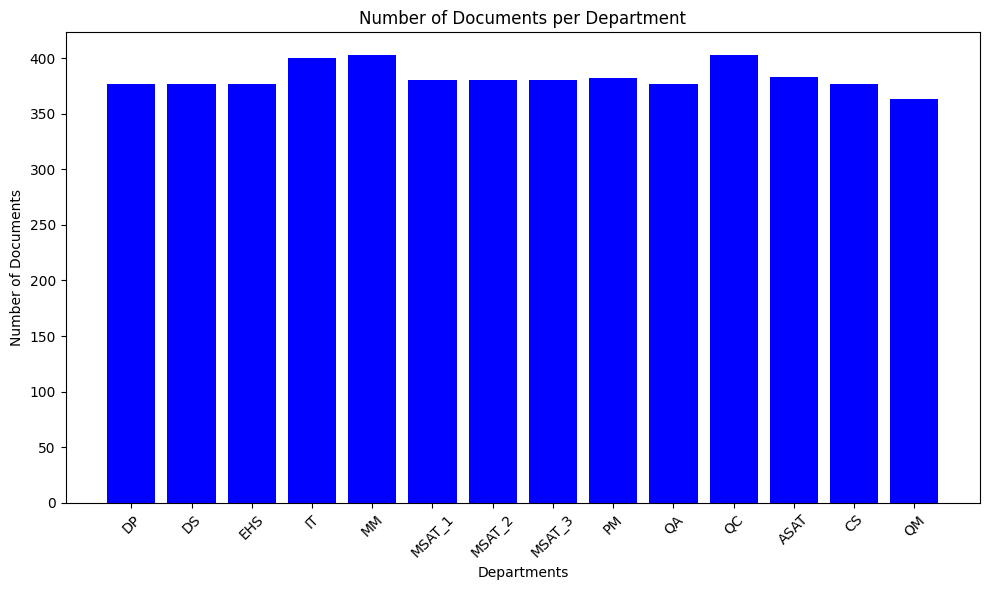

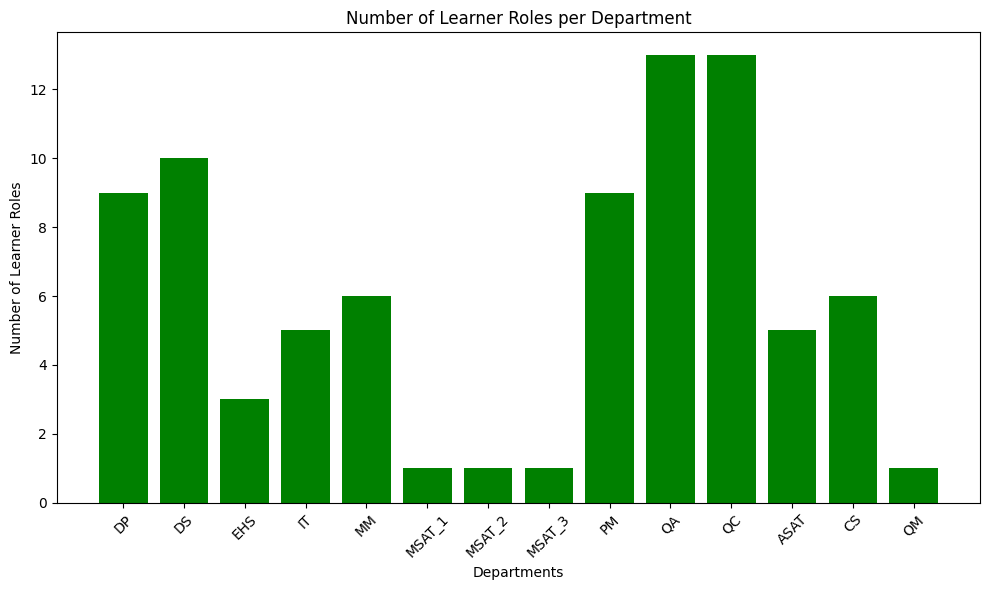

In [202]:
plt.figure(figsize=(10, 6))
departments = ['DP', 'DS', 'EHS', 'IT', 'MM', 'MSAT_1', 'MSAT_2', 'MSAT_3', 'PM', 'QA', 'QC', 'ASAT', 'CS', 'QM']
doc_counts = [DP_row_number, DS_row_number, EHS_row_number, IT_row_number, MM_row_number, MSAT_1_row_number, MSAT_2_row_number, MSAT_3_row_number, PM_row_number, QA_row_number, QC_row_number, ASAT_row_number, CS_row_number, QM_row_number]
plt.bar(departments, doc_counts, color='blue')
plt.xlabel('Departments')
plt.ylabel('Number of Documents')
plt.title('Number of Documents per Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Learner_Roles = {
    'DP': DP_col_number,
    'DS': DS_col_number,
    'EHS': EHS_col_number,
    'IT': IT_col_number,
    'MM': MM_col_number,
    'MSAT_1': MSAT_1_col_number,
    'MSAT_2': MSAT_2_col_number,
    'MSAT_3': MSAT_3_col_number,
    'PM': PM_col_number,
    'QA': QA_col_number,
    'QC': QC_col_number,
    'ASAT': ASAT_col_number,
    'CS': CS_col_number,
    'QM': QM_col_number
}
plt.figure(figsize=(10, 6))
plt.bar(Learner_Roles.keys(), Learner_Roles.values(), color='green')
plt.xlabel('Departments')
plt.ylabel('Number of Learner Roles')
plt.title('Number of Learner Roles per Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
